________
# About The Chard_Riesling Notebook
_________


* This notebook initially takes in a fully preprocessed csv with all observations and no accounting for imbalance. Another dataframe is then created that slices out observations where the value is either `Chardonnay` or `Riesling` in the `varietal` column.

* Target and predictor variables are created from this dataframe, a baseline model is prepared and quickly analyzed, the df is split into training and testing sets, vectorized and then fit for modeling. 

* I fit three different models here based on the performance of the 20 class multiclassifier on this dataset. Random Forest, Logistic Regression and Multinomial Naive Bayes. 

* After this initial modeling I then run all three models after applying Synthetic Minority Oversampling Technique (SMOTE). 

**Summary of Results**

SMOTE had a largely insiginificant effect on overall F1 Score. The only model that benefitted from SMOTE was Logistic Regression which saw no increase in its test score but saw it go from slightly overfit to neither under or overfit. 

____
## Table of Contents
_____

<a id='Preprocessing'></a>
* [Baseline Model](#baseline)
* [Random Forest Model](#random)
* [Multinomial Naive Bayes](#mnb)
* [Logistic Regression](#log_reg)
* [Boostrapped Multinomial Naive Bayes](#bootstrap)

___
# Imports
____

In [3]:
import pandas as pd
import numpy as np

# Importing Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# SKLearn Model Libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# SKLearn Metric Libraries
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, plot_roc_curve, auc, f1_score
from sklearn import metrics

# Other Libraries
from collections import Counter
from imblearn.over_sampling import SMOTE
from random import sample

from pathlib import Path

_______
# Read in Data
____

In [4]:
# wine_df = pd.read_csv('/Users/jamesopacich/Documents/dsi/projects/capstone_archive/data/preprocessed_ready_4_model.csv') 
wine_df = pd.read_csv('../data/preprocessed_all_data.csv')

In [5]:
wine_df.head(1)

,varietal,description,color,descrption,parsed
0,Riesling,"Pineapple rind, lemon pith blossom start aroma...",white,"Pineapple rind, lemon pith blossom start aroma...","Pineapple rind, lemon pith blossom start aroma..."


In [6]:
wine_df.isna().sum()

varietal       0
description    0
color          0
descrption     0
parsed         0
dtype: int64

In [7]:
wine_df.dropna(inplace = True)

In [8]:
chard_riesling = wine_df[(wine_df['varietal'] == 'Chardonnay') | (wine_df['varietal'] == 'Riesling')]
chard_riesling['varietal'].value_counts()

Chardonnay    10779
Riesling       4759
Name: varietal, dtype: int64

__________
##  Create Target and Predictor Variables With Downsampled Data
_________

In [9]:
X = chard_riesling['parsed_w_stops']
# Creating Multi-Class Targets
y = chard_riesling['varietal']

KeyError: 'parsed_w_stops'

In [ ]:
# Binarizing binary targets
y = y.map({'Riesling': 0, 'Chardonnay': 1})

In [ ]:
print(f'Feature Variables Shape: {X.shape}')
print(f'Target Variables Shape: {y.shape}')

<a id='baseline'></a>
_____
# Baseline Model for Downsampled Data
_____

In [1]:
y.value_counts(normalize = True)

NameError: name 'y' is not defined

____
# Train / Test / Split
____

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .33, 
                                                   stratify = y, 
                                                   random_state = 42)

NameError: name 'train_test_split' is not defined

_____
# Vectorizing
____

In [20]:
# Instantiate CountVectorizer()
tvec = TfidfVectorizer(max_df = .8, max_features = 500, 
                       ngram_range = (1,3))

# fit CountVectorizer()
tvec.fit(X_train)

TfidfVectorizer(max_df=0.8, max_features=500, ngram_range=(1, 3))

In [21]:
# Transform the corpus on training data
X_train = tvec.transform(X_train)
X_test = tvec.transform(X_test)

<a id='random'></a>
_____
# Random Forest
______

In [22]:
forest = RandomForestClassifier(min_samples_split = 5, n_estimators = 110, )
forest.fit(X_train, y_train)
train_preds = forest.predict(X_train)
preds = forest.predict(X_test)

In [23]:
# Testing Score
score = metrics.f1_score(y_test, preds, average = 'binary')

# Training Score
score_train = metrics.f1_score(y_train, train_preds, average = 'binary')

print(f'Training F1 Score: {round(score_train * 100, 2)}')
print(f'Test F1 Score: {round(score * 100, 2)}')



Training F1 Score: 99.51
Test F1 Score: 90.14


<a id='mnb'></a>
_____
# Multinomial Naive Bayes
_____


In [24]:
mnb = MultinomialNB(alpha = 1.0)
mnb.fit(X_train, y_train)
train_preds = mnb.predict(X_train)
preds = mnb.predict(X_test)

In [25]:
# Testing Score
score = metrics.f1_score(y_test, preds, average = 'binary')

# Training Score
score_train = metrics.f1_score(y_train, train_preds, average = 'binary')

print(f'Training F1 Score: {round(score_train * 100, 2)}')
print(f'Test F1 Score: {round(score * 100, 2)}')



Training F1 Score: 90.78
Test F1 Score: 90.46


<a id='log_reg'></a>
_____
# Logisitic Regression
____

In [26]:
{'clf': LogisticRegression(penalty='l1', solver='liblinear'), 'clf__C': 1.0, 'clf__penalty': 'l1', 'vect__max_df': 0.9, 'vect__max_features': 500, 'vect__ngram_range': (1, 2), 'vect__stop_words': 'english'}

{'clf': LogisticRegression(penalty='l1', solver='liblinear'),
 'clf__C': 1.0,
 'clf__penalty': 'l1',
 'vect__max_df': 0.9,
 'vect__max_features': 500,
 'vect__ngram_range': (1, 2),
 'vect__stop_words': 'english'}

In [27]:
log_reg = LogisticRegression(penalty = 'l1', solver = 'liblinear')
log_reg.fit(X_train, y_train)
train_preds = log_reg.predict(X_train)
preds = mnb.predict(X_test)

In [28]:
# Testing Score



score = metrics.f1_score(y_test, preds, average = 'binary')

# Training Score
score_train = metrics.f1_score(y_train, train_preds, average = 'binary')

print(f'Training F1 Score: {round(score_train * 100, 2)}')
print(f'Test F1 Score: {round(score * 100, 2)}')

Training F1 Score: 92.15
Test F1 Score: 90.46


<a id='bootstrap'></a>
________
# Bootstrapped Models
____

#### SMOTE 

"SMOTE stands for **Synthetic Minority Oversampling Technique.** This is a statistical technique for **increasing the number of cases in your dataset in a balanced way.** The module works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases.

The **new instances are not just copies** of existing minority cases; instead, the algorithm takes samples of the feature space for each target class and its nearest neighbors, and generates new examples that combine features of the target case with features of its neighbors. This approach increases the features available to each class and makes the samples more general.

SMOTE takes the entire dataset as an input, but it increases the percentage of only the minority cases. For example, suppose you have an imbalanced dataset where just 1% of the cases have the target value A (the minority class), and 99% of the cases have the value B. To increase the percentage of minority cases to twice the previous percentage, you would enter 200 for SMOTE percentage in the module's properties."

* https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/smote#:~:text=SMOTE%20stands%20for%20Synthetic%20Minority,dataset%20in%20a%20balanced%20way.&text=SMOTE%20takes%20the%20entire%20dataset,of%20only%20the%20minority%20cases.

In [29]:
def smote_oversample(x, y):

    # Instantiate Oversampler
    oversample = SMOTE()
    
    # fit oversampler
    x, y = oversample.fit_resample(x, y)
    
    # Counter creates a dict that summarizes the distribution
    counter = Counter(y)

    for key, value in counter.items():
        
        # create variable with percentage of samples of each variable 
        percent = round(value / len(y_train) * 100, 2)
        
    # create df of target labels
    ovr_sampled = pd.DataFrame(counter.keys(), columns = ['target_label'])
    # append number of samples to df
    ovr_sampled['num_samples'] = counter.values()
    # append percentage of samples to df
    ovr_sampled['percent'] = percent

    # Create a plot showing the balanced classes
    plt.bar(ovr_sampled['target_label'], ovr_sampled['percent'])
    
    plt.title('Class Labels as Percentage of Samples')
    plt.xlabel('Class')
    plt.ylabel('Percentage of Labels')
    plt.xticks(rotation = 90)
    plt.show(); 
    
    # return df of sample distributions
    print(ovr_sampled)
    
    return x, y

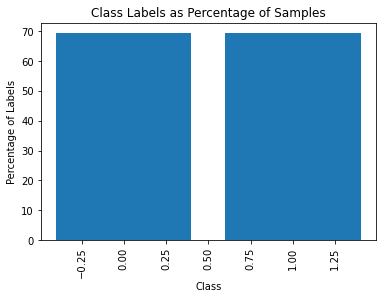

   target_label  num_samples  percent
0             1         7222    69.38
1             0         7222    69.38


In [30]:
XS_train, ys_train = smote_oversample(X_train, y_train)

In [31]:
smote_mnb = MultinomialNB(alpha = 1.0)
smote_mnb.fit(XS_train, ys_train)
train_preds = smote_mnb.predict(XS_train)
preds = smote_mnb.predict(X_test)

In [32]:
# Testing Score
score = metrics.f1_score(y_test, preds, average = 'binary')

# Training Score
score_train = metrics.f1_score(ys_train, train_preds, average = 'binary')

print(f'Training F1 Score: {round(score_train * 100, 2)}')
print(f'Test F1 Score: {round(score * 100, 2)}')



Training F1 Score: 85.45
Test F1 Score: 88.46


In [33]:
smote_log_reg = LogisticRegression(solver = 'liblinear')
smote_log_reg.fit(XS_train, ys_train)
train_preds = smote_log_reg.predict(XS_train)
preds = smote_log_reg.predict(X_test)

In [34]:
# Testing Score
score = metrics.f1_score(y_test, preds, average = 'binary')

# Training Score
score_train = metrics.f1_score(ys_train, train_preds, average = 'binary')

print(f'Training F1 Score: {round(score_train * 100, 2)}')
print(f'Test F1 Score: {round(score * 100, 2)}')



Training F1 Score: 88.44
Test F1 Score: 88.98
